### Data load & check

In [44]:
import pandas as pd

In [45]:
raw_data = pd.read_excel('titanic-passengers.xlsx')


In [46]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [47]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [48]:
raw_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Dataset preprocessing

In [50]:
def preprocess_data(data):
    data['Age'].fillna(data['Age'].mean(),inplace=True)
    data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    data['Cabin']=data.Cabin.fillna('G6')
    data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return data

In [51]:
df = preprocess_data(raw_data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [53]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
df.groupby(['Survived'])['Sex'].sum()

Survived
0    468
1    109
Name: Sex, dtype: int64

### Model building : Decision Tree

In [55]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [56]:
x = df.drop(["Survived","Name","Ticket","Cabin","Embarked"], axis = 1)
y = df["Survived"]
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,343,2,1,28.0,0,0,13.0000
1,76,3,1,25.0,0,0,7.6500
2,641,3,1,20.0,0,0,7.8542
3,568,3,0,29.0,0,4,21.0750
4,672,1,1,31.0,1,0,52.0000


In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 10)

In [58]:
Dtree = tree.DecisionTreeClassifier()
Dtree.fit(x_train,y_train)
prediction = Dtree.predict(x_test)
print("Accuracy score {}".format(accuracy_score(y_test,prediction)))

Accuracy score 0.776536312849162


### Tree Plotting

In [59]:
!pip install graphviz

In [60]:
import graphviz

In [61]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

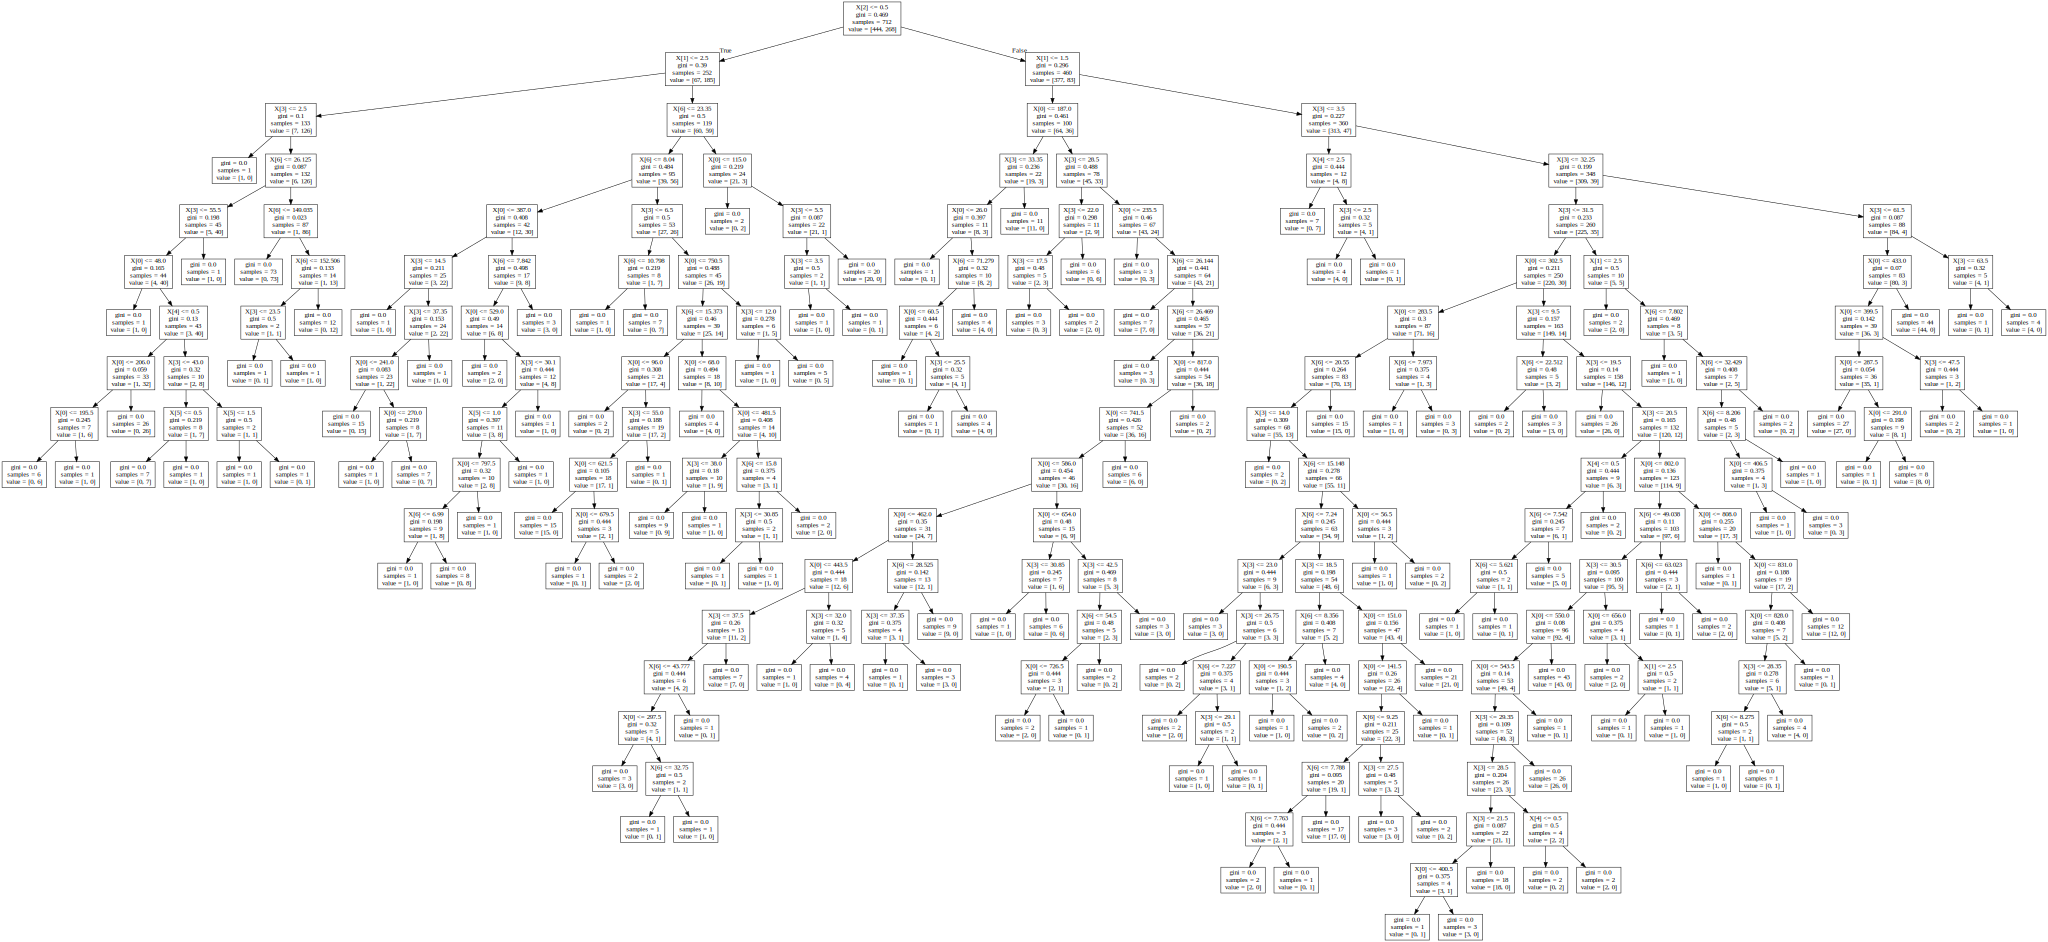

In [62]:
dot_data = tree.export_graphviz(Dtree, out_file = None)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

Honestly, I could not retrieve any conclusion from the obtained decison tree.
We will try to "Pruning" it in order to simplify things.

### Pruning the Decision Tree

In [66]:
Dtree_pur = tree.DecisionTreeClassifier(criterion = 'gini',splitter = 'random',max_leaf_nodes = 10, min_samples_leaf = 5, max_depth = 2)
Dtree_pur.fit(x_train,y_train)
prediction_pur = Dtree_pur.predict(x_test)
print("Accuracy score {}".format(accuracy_score(y_test,prediction)))

Accuracy score 0.776536312849162


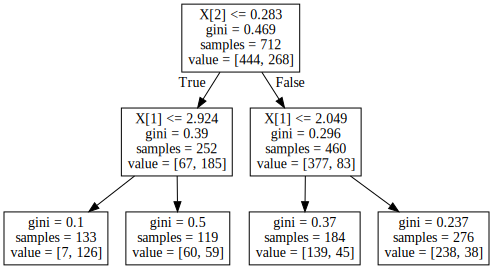

In [67]:
dot_data_pur = tree.export_graphviz(Dtree_pur, out_file = None)
graph = graphviz.Source(dot_data_pur)
graph.render("data")
graph

### Random Forest Model building

In [68]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics

In [70]:
clf1=RandomForestClassifier(n_estimators=10)  
clf1.fit(x_train, y_train)  
y_pred=clf1.predict(x_test)  
print("Accuracy for 10 estimator:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy for 10 estimator: 0.8100558659217877


Comparing the accuracy from Random Forest model with standard Decsion Tree model, Random Forest model has a better accuracy than the satndard one

In [74]:
Accuracy = []
for i in range (1,20,2):
    clf = RandomForestClassifier(n_estimators=i) 
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    Accuracy.append(metrics.accuracy_score(y_test,pred))
print(Accuracy)

[0.7988826815642458, 0.7877094972067039, 0.8044692737430168, 0.8379888268156425, 0.8435754189944135, 0.8268156424581006, 0.8491620111731844, 0.8547486033519553, 0.8435754189944135, 0.8491620111731844]


As we can consult the accuracy array shwon above, we could conclude that the model is getting better accuracy each time we increase the number of estimator